## Types of medical visits
----------------------------------

### Import packages

In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from IPython.display import HTML
from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set plot style
from collections import Counter
import scipy as sp
import sklearn as sk
import sys
import plotly.express as px
import pydot

import time
import xgboost as xgb
import shap
import dill
import gc
import subprocess
!pip3 install pickle5
import pickle5 as pickle
from statannot import add_stat_annotation

In [2]:
import os
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from collections import defaultdict

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### OPTH

In [5]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/opth_merge.pkl', 'rb') as handle:
    opth_merge = pickle.load(handle)
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/opth_enc.pkl', 'rb') as handle:
    opth_enc = pickle.load(handle)

In [6]:
slow=opth_merge[(opth_merge['output_class']==0)]
slow_tto=slow['time_to_opth(yr)'].sum()

In [7]:
fast=opth_merge[(opth_merge['output_class']==1)]
fast_tto=fast['time_to_opth(yr)'].sum()

In [8]:
fast_visit_type=[]
for x in opth_merge[opth_merge['output_class']==1].index:
    enc=opth_enc[(opth_enc.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= opth_merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= opth_merge.loc[[x]].initial_OPTH.values)]
    fast_visit_type+=before_comp.src_enc_type_name.values.tolist()

In [9]:
len(fast_visit_type)

103823

In [10]:
fast_visits = pd.DataFrame(data=fast_visit_type)

In [11]:
fast_visits['class']='fast'

In [12]:
fast_visits.columns =['visit_type','class']

In [13]:
slow_visit_type=[]
for x in opth_merge[opth_merge['output_class']==0].index:
    enc=opth_enc[(opth_enc.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= opth_merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= opth_merge.loc[[x]].initial_OPTH.values)]
    slow_visit_type+=before_comp.src_enc_type_name.values.tolist()

In [14]:
len(slow_visit_type)

354762

In [15]:
slow_visits = pd.DataFrame(data=slow_visit_type)

In [16]:
slow_visits['class']='slow'

In [17]:
slow_visits.columns =['visit_type','class']

In [18]:
slow_visits.visit_type.value_counts()/slow_tto

IDX fabricated encounter                   6.590338
Telephone                                  5.653338
History                                    4.962955
Office Visit                               3.865982
Refill                                     2.503855
                                             ...   
Documentation with Professional Charges    0.000205
Cardiology Procedure                       0.000102
Remote Care Management                     0.000102
Core Test                                  0.000102
Lactation Encounter                        0.000102
Name: visit_type, Length: 93, dtype: float64

In [359]:
fast_visits.visit_type.value_counts().head(20)/fast_tto

IDX fabricated encounter               11.102644
History                                 7.431563
Telephone                               7.418718
Office Visit                            5.377401
Hospital Encounter|Outpatient [102]     3.279568
Refill                                  2.337777
Lab Only                                2.243239
Clinical Documentation                  1.659565
Conversion Encounter                    1.595854
Letter (Out)                            1.137033
Patient Message                         1.050201
Therapy                                 0.928432
Ancillary Orders                        0.870372
Abstract                                0.644302
Results Only                            0.392541
Scan Encounter                          0.364282
Hospital Encounter|Emergency [103]      0.330885
Surgery                                 0.327803
Anesthesia Event                        0.305196
Hospital Encounter|Inpatient [101]      0.298516
Name: visit_type, dt

In [20]:
slow_types=slow_visits[slow_visits.visit_type.isin(['Telephone', 'History', 
                                                    'Office Visit','Refill', 
                                                    'Hospital Encounter|Outpatient [102]', 
                                                    'Lab Only','Therapy',
                                                    'Hospital Encounter|Emergency [103]',
                                                    'Surgery', 'Hospital Encounter|Inpatient [101]'
                                                    ])]

In [21]:
slow_types.visit_type.value_counts()/slow_tto

Telephone                              5.653338
History                                4.962955
Office Visit                           3.865982
Refill                                 2.503855
Hospital Encounter|Outpatient [102]    1.816340
Lab Only                               1.707677
Therapy                                0.676352
Hospital Encounter|Emergency [103]     0.280414
Surgery                                0.202680
Hospital Encounter|Inpatient [101]     0.143996
Name: visit_type, dtype: float64

In [22]:
d = {'Visit Type': ['Telephone', 'History', 'Office Visit','Refill', 
                    'Hospital - Outpatient', 'Lab Only',
                    'Therapy','Hospital - Emergency',
                    'Surgery', 'Hospital - Inpatient'],
     'Visits/Patient Years': [5.65333793, 4.96295476, 3.86598189, 2.50385518, 1.81633964,
                    1.70767675,  0.676352, 0.28041375, 0.20268036, 0.14399625]}                        

In [23]:
slow_df= pd.DataFrame(data=d)               

In [24]:
slow_df['Class']='Slow'

In [25]:
fast_types=fast_visits[fast_visits.visit_type.isin(['Telephone', 'History', 
                                                    'Office Visit','Refill', 
                                                    'Hospital Encounter|Outpatient [102]', 
                                                    'Lab Only','Therapy',
                                                    'Hospital Encounter|Emergency [103]',
                                                    'Surgery', 'Hospital Encounter|Inpatient [101]'
                                                    ])]

In [26]:
fast_types.visit_type.value_counts()/fast_tto

History                                7.431563
Telephone                              7.418718
Office Visit                           5.377401
Hospital Encounter|Outpatient [102]    3.279568
Refill                                 2.337777
Lab Only                               2.243239
Therapy                                0.928432
Hospital Encounter|Emergency [103]     0.330885
Surgery                                0.327803
Hospital Encounter|Inpatient [101]     0.298516
Name: visit_type, dtype: float64

In [27]:
a=fast_types.visit_type.value_counts()/fast_tto

In [28]:
x = {'Visit Type': ['Telephone', 'History', 'Office Visit','Refill', 
                    'Hospital - Outpatient', 'Lab Only',
                    'Therapy','Hospital - Emergency',
                    'Surgery', 'Hospital - Inpatient'],
     'Visits/Patient Years': [7.41871773,7.43156266, 5.37740147, 2.33777725, 3.27956751,
       2.24323856, 0.87037245, 0.3308854 , 0.32780261, 0.29851617]}                        

In [29]:
fast_df= pd.DataFrame(data=x)   
fast_df['Class']='Fast'

In [33]:
frames = [slow_df, fast_df]

In [34]:
result = pd.concat(frames)

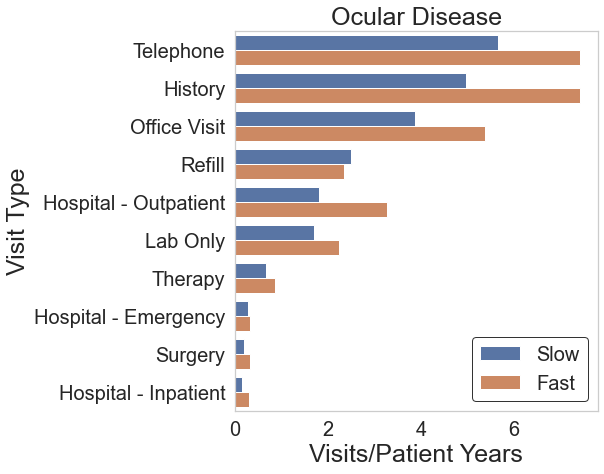

In [35]:
sns.set(style="whitegrid")
ax=sns.barplot(data=result, y='Visit Type', x='Visits/Patient Years', hue='Class')
ax.tick_params(labelsize=20)
ax.set_xlabel("Visits/Patient Years",fontsize=25)
ax.set_ylabel("Visit Type",fontsize=25)
sns.set(rc={'figure.figsize':(6.5,7)})
ax.grid(False)
legend = plt.legend(loc="lower right", edgecolor="black", fontsize=20)
legend.get_frame().set_facecolor('white')
plt.title('Ocular Disease',fontsize=25)
plt.savefig(r'/Users/amomenzadeh/Desktop/DM_figures/opth_visit_types.svg', format='svg',bbox_inches='tight')
plt.show()

## CVD

In [105]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/cv_merge.pkl', 'rb') as handle:
    cv_merge = pickle.load(handle)
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/cv_enc.pkl', 'rb') as handle:
    cv_enc = pickle.load(handle)

In [106]:
slow=cv_merge[(cv_merge['output_class']==0)]
slow_tto=slow['time_to_CV(yr)'].sum()

In [107]:
fast=cv_merge[(cv_merge['output_class']==1)]
fast_tto=fast['time_to_CV(yr)'].sum()

In [108]:
fast_visit_type=[]
for x in cv_merge[cv_merge['output_class']==1].index:
    enc=cv_enc[(cv_enc.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= cv_merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= cv_merge.loc[[x]].initial_CVD.values)]
    fast_visit_type+=before_comp.src_enc_type_name.values.tolist()

In [109]:
len(fast_visit_type)

162771

In [110]:
fast_visits = pd.DataFrame(data=fast_visit_type)

In [111]:
fast_visits['Class']='Fast'

In [112]:
fast_visits.columns =['visit_type','class']

In [113]:
slow_visit_type=[]
for x in cv_merge[cv_merge['output_class']==0].index:
    enc=cv_enc[(cv_enc.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= cv_merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= cv_merge.loc[[x]].initial_CVD.values)]
    slow_visit_type+=before_comp.src_enc_type_name.values.tolist()

In [114]:
len(slow_visit_type)

500713

In [115]:
slow_visits = pd.DataFrame(data=slow_visit_type)

In [116]:
slow_visits['Class']='Slow'

In [117]:
slow_visits.columns =['visit_type','class']

In [119]:
slow_visits.visit_type.value_counts()/slow_tto

IDX fabricated encounter               6.245975
Telephone                              5.312943
History                                4.531794
Office Visit                           3.453655
Refill                                 2.243356
                                         ...   
Ancillary Procedure                    0.000201
Community Orders                       0.000134
Consent/Legal                          0.000067
Clinical Documentation with Charges    0.000067
Cardiology Consult Visit               0.000067
Name: visit_type, Length: 96, dtype: float64

In [120]:
fast_visits.visit_type.value_counts().head(20)/fast_tto

IDX fabricated encounter               14.793065
Telephone                               8.087588
History                                 7.502164
Hospital Encounter|Outpatient [102]     5.334274
Office Visit                            4.565222
Lab Only                                2.091530
Clinical Documentation                  2.039533
Refill                                  2.001353
Conversion Encounter                    1.198484
Ancillary Orders                        1.187212
Letter (Out)                            1.137760
Patient Message                         0.898136
Therapy                                 0.879228
Results Only                            0.725781
Abstract                                0.594515
Hospital Encounter|Inpatient [101]      0.470522
Hospital Encounter|Emergency [103]      0.437796
Surgery                                 0.379617
Anesthesia Event                        0.336347
Anesthesia                              0.320711
Name: visit_type, dt

In [121]:
slow_types=slow_visits[slow_visits.visit_type.isin(['Telephone', 'History', 
                                                    'Office Visit','Refill', 
                                                    'Hospital Encounter|Outpatient [102]', 
                                                    'Lab Only','Therapy',
                                                    'Hospital Encounter|Emergency [103]',
                                                    'Surgery', 'Hospital Encounter|Inpatient [101]'
                                                    ])]

In [122]:
slow_types.visit_type.value_counts()/slow_tto

Telephone                              5.312943
History                                4.531794
Office Visit                           3.453655
Refill                                 2.243356
Hospital Encounter|Outpatient [102]    1.693452
Lab Only                               1.586047
Therapy                                0.672202
Hospital Encounter|Emergency [103]     0.290818
Surgery                                0.197770
Hospital Encounter|Inpatient [101]     0.182675
Name: visit_type, dtype: float64

In [123]:
d = {'Visit Type': ['Telephone', 'History', 'Office Visit','Refill', 
                    'Hospital - Outpatient', 'Lab Only',
                    'Therapy','Hospital - Emergency',
                    'Surgery', 'Hospital - Inpatient'],
     'Visits/Patient Years': [5.31294312, 4.5317937 , 3.45365454, 2.24335595, 1.69345198,
       1.58604729, 0.67220175, 0.29081782, 0.19776954, 0.18267519]}                        

In [124]:
slow_df= pd.DataFrame(data=d)               

In [125]:
slow_df['Class']='Slow'

In [126]:
fast_types=fast_visits[fast_visits.visit_type.isin(['Telephone', 'History', 
                                                    'Office Visit','Refill', 
                                                    'Hospital Encounter|Outpatient [102]', 
                                                    'Lab Only','Therapy',
                                                    'Hospital Encounter|Emergency [103]',
                                                    'Surgery', 'Hospital Encounter|Inpatient [101]'
                                                    ])]

In [127]:
fast_types.visit_type.value_counts().index

Index(['Telephone', 'History', 'Hospital Encounter|Outpatient [102]',
       'Office Visit', 'Lab Only', 'Refill', 'Therapy',
       'Hospital Encounter|Inpatient [101]',
       'Hospital Encounter|Emergency [103]', 'Surgery'],
      dtype='object')

In [128]:
fast_types.visit_type.value_counts().values/fast_tto

array([8.08758834, 7.50216359, 5.33427394, 4.56522217, 2.0915299 ,
       2.00135268, 0.87922797, 0.4705215 , 0.4377959 , 0.37961704])

In [129]:
fast_types.visit_type.value_counts()/fast_tto

Telephone                              8.087588
History                                7.502164
Hospital Encounter|Outpatient [102]    5.334274
Office Visit                           4.565222
Lab Only                               2.091530
Refill                                 2.001353
Therapy                                0.879228
Hospital Encounter|Inpatient [101]     0.470522
Hospital Encounter|Emergency [103]     0.437796
Surgery                                0.379617
Name: visit_type, dtype: float64

In [130]:
x = {'Visit Type': ['Telephone', 'History', 'Hospital - Outpatient',
       'Office Visit', 'Lab Only', 'Refill', 'Therapy',
       'Hospital - Inpatient',
       'Hospital - Emergency', 'Surgery'],
     'Visits/Patient Years': fast_types.visit_type.value_counts().values/fast_tto}                        

In [131]:
fast_df= pd.DataFrame(data=x)   
fast_df['Class']='Fast'

In [132]:
frames = [slow_df, fast_df]

In [134]:
result = pd.concat(frames)

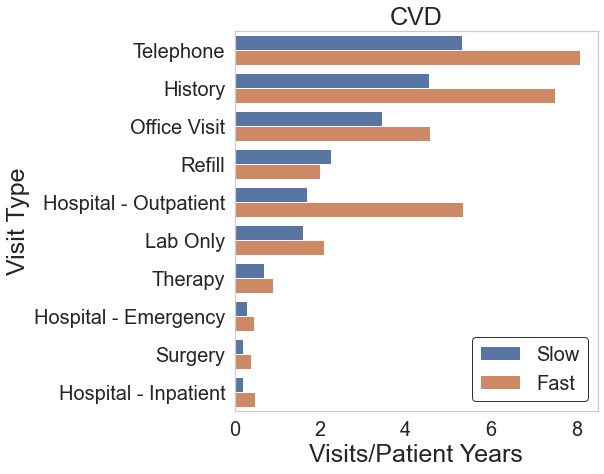

In [135]:
sns.set(style="whitegrid")
ax=sns.barplot(data=result, y='Visit Type', x='Visits/Patient Years', hue='Class')
ax.tick_params(labelsize=20)
ax.set_xlabel("Visits/Patient Years",fontsize=25)
ax.set_ylabel("Visit Type",fontsize=25)
sns.set(rc={'figure.figsize':(6.5,7)})
ax.grid(False)
legend = plt.legend(loc="lower right", edgecolor="black", fontsize=20)
legend.get_frame().set_facecolor('white')
plt.title('CVD',fontsize=25)
plt.savefig(r'/Users/amomenzadeh/Desktop/DM_figures/cvd_visit_types.svg', format='svg',bbox_inches='tight')
plt.show()

## Renal

In [37]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/renal_merge.pkl', 'rb') as handle:
    renal_merge = pickle.load(handle)
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/renal_enc.pkl', 'rb') as handle:
    renal_enc = pickle.load(handle)

In [38]:
slow=renal_merge[(renal_merge['output_class']==0)]
slow_tto=slow['time_to_renal(yr)'].sum()

In [39]:
fast=renal_merge[(renal_merge['output_class']==1)]
fast_tto=fast['time_to_renal(yr)'].sum()

In [40]:
fast_visit_type=[]
for x in renal_merge[renal_merge['output_class']==1].index:
    enc=renal_enc[(renal_enc.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= renal_merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= renal_merge.loc[[x]].initial_KIDNEY.values)]
    fast_visit_type+=before_comp.src_enc_type_name.values.tolist()

In [41]:
len(fast_visit_type)

227754

In [42]:
fast_visits = pd.DataFrame(data=fast_visit_type)

In [43]:
fast_visits['Class']='Fast'

In [44]:
fast_visits.columns =['visit_type','class']

In [45]:
slow_visit_type=[]
for x in renal_merge[renal_merge['output_class']==0].index:
    enc=renal_enc[(renal_enc.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= renal_merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= renal_merge.loc[[x]].initial_KIDNEY.values)]
    slow_visit_type+=before_comp.src_enc_type_name.values.tolist()

In [46]:
len(slow_visit_type)

549647

In [47]:
slow_visits = pd.DataFrame(data=slow_visit_type)

In [48]:
slow_visits['Class']='Slow'

In [49]:
slow_visits.columns =['visit_type','class']

In [50]:
slow_visits.visit_type.value_counts()/slow_tto

IDX fabricated encounter                            5.449334
Telephone                                           4.930026
History                                             4.224655
Office Visit                                        3.170497
Refill                                              2.261723
                                                      ...   
Hospital Encounter|Outpatient Surgical MHC [128]    0.000281
Cardiology Consult Visit                            0.000224
Video-Visit                                         0.000112
Remote Care Management                              0.000112
Clinical Documentation with Charges                 0.000056
Name: visit_type, Length: 95, dtype: float64

In [51]:
fast_visits.visit_type.value_counts().head(20)/fast_tto

IDX fabricated encounter               15.911139
Telephone                               8.882441
History                                 7.964399
Hospital Encounter|Outpatient [102]     6.196433
Office Visit                            4.585725
Clinical Documentation                  2.510810
Lab Only                                2.358317
Refill                                  2.251235
Letter (Out)                            1.217422
Patient Message                         1.084271
Ancillary Orders                        1.049791
Conversion Encounter                    1.032692
Results Only                            0.800308
Therapy                                 0.728267
Abstract                                0.605768
Hospital Encounter|Inpatient [101]      0.569326
Hospital Encounter|Emergency [103]      0.484390
Surgery                                 0.426644
Anesthesia Event                        0.399173
Anesthesia                              0.374505
Name: visit_type, dt

In [52]:
slow_types=slow_visits[slow_visits.visit_type.isin(['Telephone', 'History', 
                                                    'Office Visit','Refill', 
                                                    'Hospital Encounter|Outpatient [102]', 
                                                    'Lab Only','Therapy',
                                                    'Hospital Encounter|Emergency [103]',
                                                    'Surgery', 'Hospital Encounter|Inpatient [101]'
                                                    ])]

In [53]:
slow_types.visit_type.value_counts()/slow_tto

Telephone                              4.930026
History                                4.224655
Office Visit                           3.170497
Refill                                 2.261723
Hospital Encounter|Outpatient [102]    1.605112
Lab Only                               1.408443
Therapy                                0.576148
Hospital Encounter|Emergency [103]     0.284427
Surgery                                0.169792
Hospital Encounter|Inpatient [101]     0.160029
Name: visit_type, dtype: float64

In [54]:
slow_types.visit_type.value_counts().index

Index(['Telephone', 'History', 'Office Visit', 'Refill',
       'Hospital Encounter|Outpatient [102]', 'Lab Only', 'Therapy',
       'Hospital Encounter|Emergency [103]', 'Surgery',
       'Hospital Encounter|Inpatient [101]'],
      dtype='object')

In [55]:
slow_types.visit_type.value_counts().values/slow_tto

array([4.93002632, 4.22465471, 3.170497  , 2.26172294, 1.6051118 ,
       1.40844268, 0.57614794, 0.28442675, 0.16979194, 0.16002863])

In [56]:
d = {'Visit Type': ['Telephone', 'History', 'Office Visit','Refill', 
                    'Hospital - Outpatient', 'Lab Only',
                    'Therapy','Hospital - Emergency',
                    'Surgery', 'Hospital - Inpatient'],
     'Visits/Patient Years': [4.93002632, 4.22465471, 3.170497  , 2.26172294, 1.6051118 ,
       1.40844268, 0.57614794, 0.28442675, 0.16979194, 0.16002863]}                        

In [57]:
slow_df= pd.DataFrame(data=d)               

In [58]:
slow_df['Class']='Slow'

In [59]:
fast_types=fast_visits[fast_visits.visit_type.isin(['Telephone', 'History', 
                                                    'Office Visit','Refill', 
                                                    'Hospital Encounter|Outpatient [102]', 
                                                    'Lab Only','Therapy',
                                                    'Hospital Encounter|Emergency [103]',
                                                    'Surgery', 'Hospital Encounter|Inpatient [101]'
                                                    ])]

In [60]:
fast_types.visit_type.value_counts().index

Index(['Telephone', 'History', 'Hospital Encounter|Outpatient [102]',
       'Office Visit', 'Lab Only', 'Refill', 'Therapy',
       'Hospital Encounter|Inpatient [101]',
       'Hospital Encounter|Emergency [103]', 'Surgery'],
      dtype='object')

In [61]:
fast_types.visit_type.value_counts().values/fast_tto

array([8.88244132, 7.96439937, 6.19643278, 4.58572467, 2.35831662,
       2.25123509, 0.72826656, 0.56932617, 0.48438977, 0.42664423])

In [62]:
fast_types.visit_type.value_counts()/fast_tto

Telephone                              8.882441
History                                7.964399
Hospital Encounter|Outpatient [102]    6.196433
Office Visit                           4.585725
Lab Only                               2.358317
Refill                                 2.251235
Therapy                                0.728267
Hospital Encounter|Inpatient [101]     0.569326
Hospital Encounter|Emergency [103]     0.484390
Surgery                                0.426644
Name: visit_type, dtype: float64

In [63]:
x = {'Visit Type': ['Telephone', 'History', 'Hospital - Outpatient',
       'Office Visit', 'Lab Only', 'Refill', 'Therapy',
       'Hospital - Inpatient',
       'Hospital - Emergency', 'Surgery'],
     'Visits/Patient Years': fast_types.visit_type.value_counts().values/fast_tto}                        

In [65]:
fast_df= pd.DataFrame(data=x)   
fast_df['Class']='Fast'

In [69]:
frames = [slow_df, fast_df]

In [70]:
result = pd.concat(frames)

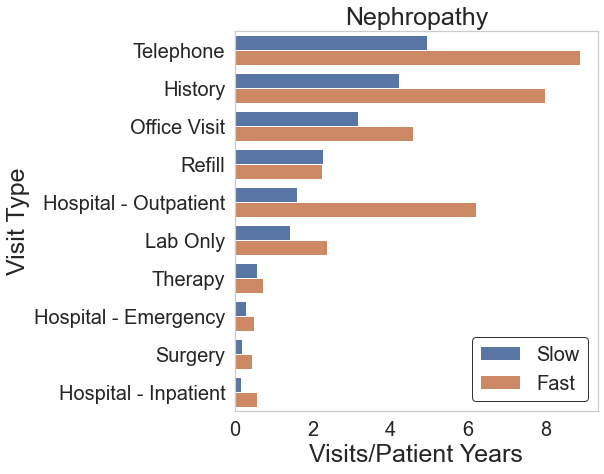

In [71]:
sns.set(style="whitegrid")
ax=sns.barplot(data=result, y='Visit Type', x='Visits/Patient Years', hue='Class')
ax.tick_params(labelsize=20)
ax.set_xlabel("Visits/Patient Years",fontsize=25)
ax.set_ylabel("Visit Type",fontsize=25)
sns.set(rc={'figure.figsize':(6.5,7)})
ax.grid(False)
legend = plt.legend(loc="lower right", edgecolor="black", fontsize=20)
legend.get_frame().set_facecolor('white')
plt.title('Nephropathy',fontsize=25)
plt.savefig(r'/Users/amomenzadeh/Desktop/DM_figures/renal_visit_types.svg', format='svg',bbox_inches='tight')
plt.show()

## Neuro

In [72]:
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/neur_merge.pkl', 'rb') as handle:
    neuro_merge = pickle.load(handle)
with open(r'/Users/amomenzadeh/Desktop/DM_pickles/neuro_enc.pkl', 'rb') as handle:
    neuro_enc = pickle.load(handle)

In [73]:
slow=neuro_merge[(neuro_merge['output_class']==0)]
slow_tto=slow['time_to_neuro(yr)'].sum()

In [74]:
fast=neuro_merge[(neuro_merge['output_class']==1)]
fast_tto=fast['time_to_neuro(yr)'].sum()

In [75]:
fast_visit_type=[]
for x in neuro_merge[neuro_merge['output_class']==1].index:
    enc=neuro_enc[(neuro_enc.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= neuro_merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= neuro_merge.loc[[x]].initial_NEUROPATH.values)]
    fast_visit_type+=before_comp.src_enc_type_name.values.tolist()

In [76]:
len(fast_visit_type)

189416

In [77]:
fast_visits = pd.DataFrame(data=fast_visit_type)

In [78]:
fast_visits['Class']='Fast'

In [79]:
fast_visits.columns =['visit_type','class']

In [80]:
slow_visit_type=[]
for x in neuro_merge[neuro_merge['output_class']==0].index:
    enc=neuro_enc[(neuro_enc.patient_num==x)]
    after_DM=enc[(enc.i2b2_date_shifted.values >= neuro_merge.loc[[x]].initial_DIAB.values)]
    before_comp=after_DM[(after_DM.i2b2_date_shifted.values <= neuro_merge.loc[[x]].initial_NEUROPATH.values)]
    slow_visit_type+=before_comp.src_enc_type_name.values.tolist()

In [81]:
len(slow_visit_type)

518141

In [82]:
slow_visits = pd.DataFrame(data=slow_visit_type)

In [83]:
slow_visits['Class']='Slow'

In [84]:
slow_visits.columns =['visit_type','class']

In [86]:
slow_visits.visit_type.value_counts()/slow_tto

IDX fabricated encounter                            7.308764
Telephone                                           5.786261
History                                             4.809738
Office Visit                                        3.716084
Refill                                              2.511359
                                                      ...   
E-Consult                                           0.000141
Hospital Encounter|Outpatient Surgical MHC [128]    0.000070
Consent/Legal                                       0.000070
Community Orders                                    0.000070
Remote Care Management                              0.000070
Name: visit_type, Length: 94, dtype: float64

In [87]:
fast_visits.visit_type.value_counts().head(20)/fast_tto

IDX fabricated encounter               13.450361
Telephone                               9.504834
History                                 8.829346
Hospital Encounter|Outpatient [102]     6.628485
Office Visit                            5.518903
Refill                                  2.613890
Lab Only                                2.560017
Clinical Documentation                  2.442946
Patient Message                         1.589607
Letter (Out)                            1.307118
Therapy                                 1.119597
Ancillary Orders                        0.896507
Conversion Encounter                    0.748355
Abstract                                0.544258
Hospital Encounter|Emergency [103]      0.520084
Surgery                                 0.502817
Hospital Encounter|Inpatient [101]      0.481061
Anesthesia Event                        0.465175
Anesthesia                              0.446181
Results Only                            0.445836
Name: visit_type, dt

In [88]:
slow_types=slow_visits[slow_visits.visit_type.isin(['Telephone', 'History', 
                                                    'Office Visit','Refill', 
                                                    'Hospital Encounter|Outpatient [102]', 
                                                    'Lab Only','Therapy',
                                                    'Hospital Encounter|Emergency [103]',
                                                    'Surgery', 'Hospital Encounter|Inpatient [101]'
                                                    ])]

In [89]:
slow_types.visit_type.value_counts()/slow_tto

Telephone                              5.786261
History                                4.809738
Office Visit                           3.716084
Refill                                 2.511359
Hospital Encounter|Outpatient [102]    1.716807
Lab Only                               1.708280
Therapy                                0.695744
Hospital Encounter|Emergency [103]     0.305797
Surgery                                0.207130
Hospital Encounter|Inpatient [101]     0.166184
Name: visit_type, dtype: float64

In [90]:
slow_types.visit_type.value_counts().values/slow_tto

array([5.78626068, 4.80973845, 3.7160843 , 2.5113592 , 1.71680727,
       1.70827961, 0.6957439 , 0.30579748, 0.2071304 , 0.16618356])

In [91]:
d = {'Visit Type': ['Telephone', 'History', 'Office Visit','Refill', 
                    'Hospital - Outpatient', 'Lab Only',
                    'Therapy','Hospital - Emergency',
                    'Surgery', 'Hospital - Inpatient'],
     'Visits/Patient Years': [5.78626068, 4.80973845, 3.7160843 , 2.5113592 , 1.71680727,
       1.70827961, 0.6957439 , 0.30579748, 0.2071304 , 0.16618356]}                        

In [92]:
slow_df= pd.DataFrame(data=d)               

In [94]:
slow_df['Class']='Slow'

In [95]:
fast_types=fast_visits[fast_visits.visit_type.isin(['Telephone', 'History', 
                                                    'Office Visit','Refill', 
                                                    'Hospital Encounter|Outpatient [102]', 
                                                    'Lab Only','Therapy',
                                                    'Hospital Encounter|Emergency [103]',
                                                    'Surgery', 'Hospital Encounter|Inpatient [101]'
                                                    ])]

In [96]:
fast_types.visit_type.value_counts().index

Index(['Telephone', 'History', 'Hospital Encounter|Outpatient [102]',
       'Office Visit', 'Refill', 'Lab Only', 'Therapy',
       'Hospital Encounter|Emergency [103]', 'Surgery',
       'Hospital Encounter|Inpatient [101]'],
      dtype='object')

In [97]:
fast_types.visit_type.value_counts().values/fast_tto

array([9.50483424, 8.82934626, 6.62848485, 5.51890259, 2.61388985,
       2.56001658, 1.11959716, 0.52008431, 0.50281723, 0.48106072])

In [98]:
fast_types.visit_type.value_counts()/fast_tto

Telephone                              9.504834
History                                8.829346
Hospital Encounter|Outpatient [102]    6.628485
Office Visit                           5.518903
Refill                                 2.613890
Lab Only                               2.560017
Therapy                                1.119597
Hospital Encounter|Emergency [103]     0.520084
Surgery                                0.502817
Hospital Encounter|Inpatient [101]     0.481061
Name: visit_type, dtype: float64

In [99]:
x = {'Visit Type': ['Telephone', 'History', 'Hospital - Outpatient',
       'Office Visit', 'Refill', 'Lab Only', 'Therapy',
       'Hospital - Emergency', 'Surgery',
       'Hospital - Inpatient'],
     'Visits/Patient Years': fast_types.visit_type.value_counts().values/fast_tto}                        

In [100]:
fast_df= pd.DataFrame(data=x)   
fast_df['Class']='Fast'

In [ ]:
frames = [slow_df, fast_df]

In [103]:
result = pd.concat(frames)

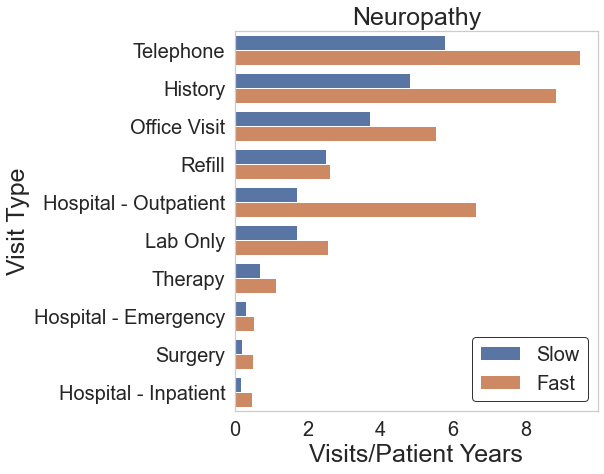

In [104]:
sns.set(style="whitegrid")
ax=sns.barplot(data=result, y='Visit Type', x='Visits/Patient Years', hue='Class')
ax.tick_params(labelsize=20)
ax.set_xlabel("Visits/Patient Years",fontsize=25)
ax.set_ylabel("Visit Type",fontsize=25)
sns.set(rc={'figure.figsize':(6.5,7)})
ax.grid(False)
legend = plt.legend(loc="lower right", edgecolor="black", fontsize=20)
legend.get_frame().set_facecolor('white')
plt.title('Neuropathy',fontsize=25)
plt.savefig(r'/Users/amomenzadeh/Desktop/DM_figures/neuro_visit_types.svg', format='svg',bbox_inches='tight')
plt.show()